In [ ]:
AIM 
    To implement feature selection and feature extraction techniques on a given dataset.

In [ ]:
DESCRIPTION 

    FEATURE SELECTION: 
        Process of selecting a subset of relevant features from the original features 
        to reducemodel complexity, enhance the computational efficiency of the models 
        and reduce generalization error introduced dur to noise by irrelevant features. 
        
    Methods: 
        Remove unused columns 
        Remove column with outlier 
        Remove features with missing values 
        Remove features with low variance 
        Remove uncorrelated features with target 
        Remove highly correlated features - Multicollinearity Univariate feature selection 
        Information gain-based feature selection 
        
    Univariate Feature Selection 
    
        1)Statistical tests can help to select independent features that 
        have the strongestrelationship with the target feature 
        2)The Scikit-learn library provides the SelectKBest class that can be 
        used with asuite of different statistical tests to select a specific number of features. 
        3)Information gain-based feature selection 
            It calculates mutual information value for each of independent variables respectto
            dependent variable, and selects the ones which has most information gain. 
            It basically measures the dependency of features with the target value. 
    FEATURE EXTRACTION: 
        • Feature extraction refers to the process of transforming original features into a newset of features
        that preserve the information in the original data set. 
                It yields better results than applying machine learning directly to the raw data. 
    Principal Component Analysis 
        o PCA is a dimensionality reduction technique that enables you to identify correlations and patterns in the
        data set so that it can be transformed into a data set of significantly lower dimension without loss of important information. 
    Linear Discriminant Analysis 
        PCA is an unsupervised dimensionality reduction technique while LDA is a supervised dimensionality reduction technique. 
        PCA summarizes the feature set without relying on the output. 
        LDA tries to reduce dimensions of the feature set while retaining the information. 
    DATA REDUCTION: 
        Data reduction techniques can be applied to obtain a reduced representation of the data set that is much smaller in volume,
        yet closely maintains the integrity of the original data. 
            • Dimensionality reduction, numerosity reduction, data compression. 
            • Feature selection and Feature extraction 
            • Drop missing values 
            • Drop the outliers 
            • Drop duplicates 
    DIMENSIONALITY REDUCTION: 
        Feature extraction refers to the process of transforming raw data into numerical features that can be processed while
        preserving the information in the original data set. It yields better results than applying machine learning directly to the 
        raw data. One-Hot encoding – creates additional features based on the number of unique values in the categorical feature,
        create dummy variables. 
        There are various methods to reduce the dimensionality of the data: 
            1. Feature Selection Methods: Using Correlation Coefficient Methods 
            2. Matrix Factorization: PCA 
            3. Manifold Learning: t-SNE 
            4. Auto Encoders 
    Correlation Coefficient Methods 
        Some of the datasets have a large number of features, and only some of these features are correlated with the target class 
        label. Feature selection techniques use scoring or statistical methods to select which features to keep and which features to delete. 
        Techniques or algorithms used to reduce dimensions by Correlation Coefficient Methods are: 
        1. Pearson Correlation Coefficient 
        2. Spearman Correlation Coefficient 
        3. Chi-Squared Test 
        4. Kendall Tau Test 
    Matrix Factorization: 
        Matrix Factorization methods can be used for dimension reduction. Principal Component Analysis (PCA) is a matrix factorization technique to reduce higher dimension data to lower dimensions. PCA preserves the direction with maximal variance. 
    Steps to follow for PCA: 
        Given dataset X of shape (n-rows, d-features) 
        Standardize the dataset X 
        Compute covariance matrix (S) 
        Find eigenvalues and eigenvector from the covariance matrix. 
        To pick top f features, pick the eigenvectors having corresponding top x largest eigenvalues. 


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
1) Read and analyze the data 

In [38]:
df=pd.read_csv("insurance.csv")
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
2) Split the dataset into train and test sets

In [39]:
y=df["smoker"]
x=df.loc[:,df.columns!='smoker']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)

In [ ]:
3) check shape of training and test sets

In [40]:
print('shape for train set',x_train.shape,y_train.shape)
print('shape for test set',x_test.shape,y_test.shape)

shape for train set (1003, 6) (1003,)
shape for test set (335, 6) (335,)


In [ ]:
4) Perform scaling in the data using Standard Scalar

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_cols=["age","bmi","children","charges"]
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

In [ ]:
5) Calculate the % of missing values in a column

In [42]:
print('Percent of missing values per column:')
100 - ((df.count() / df.shape[0]) * 100)

Percent of missing values per column:


age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [ ]:
6) Remove features with missing values (&gt;20%) 

In [43]:
missing_vals = 100 - ((df.count() / df.shape[0]) * 100)
df.drop(columns = df.columns[missing_vals > 20], inplace=True)

In [ ]:
7)If the missing values is &lt;20%,do data imputation(mean/median)

In [44]:
cols_lt_20_nan = df.columns[(missing_vals > 0) & (missing_vals < 20)]
df[cols_lt_20_nan] = df[cols_lt_20_nan].fillna(value = df[cols_lt_20_nan].mean())
print('Percent of missing values per column:')
100 - ((df.count() / df.shape[0]) * 100)

Percent of missing values per column:


age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [ ]:
8) Remove the outliers

In [45]:
from scipy.stats import zscore
zscores = np.abs(zscore(df[numeric_cols]))
df = df[(zscores <= 3).all(axis  = 1)]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
9) Use sklearn variancethreshold to find the constant features and display the constant features

In [46]:
df_copy = df.copy()
new_col = np.empty(df_copy.shape[0])
new_col.fill(5)
df_copy['Constant_col'] = new_col
copy_numeric = df_copy[numeric_cols + ['Constant_col']]
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(copy_numeric)
print('The constant columns are: ')
cols = np.setdiff1d(copy_numeric.columns, copy_numeric.columns[selector.get_support(indices=True)])
print(cols)

The constant columns are: 
['Constant_col']


In [ ]:
10)Remove features with low variance 

In [47]:
df_copy.drop(columns = cols, inplace = True)
df_copy.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
11)Remove highly correlated features 

In [48]:
print("There are no columns with high correlation")
(np.abs(df.corr()) > 0.7)

There are no columns with high correlation


ValueError: could not convert string to float: 'female'

In [ ]:
12) Perform Univariate feature selection(SelectKBest, SelectPercentile)

In [49]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
y = df['smoker']
x = df.loc[:, df.columns != 'smoker']
k = 3
selector = SelectKBest(k = k)
selector.fit(x[numeric_cols], y)
print(k, 'best features are:', selector.get_feature_names_out())
p = 50
selector = SelectPercentile(percentile = p)
selector.fit(x[numeric_cols], y)
print('Features in top', p, 'percentile are:', selector.get_feature_names_out())

3 best features are: ['age' 'children' 'charges']
Features in top 50 percentile are: ['age' 'charges']


In [ ]:
13)Apply Pearson Correlation Coefficient/Spearmans rank coefficient and find Correlation-Matrix with Heatmap 

Pearson correlation


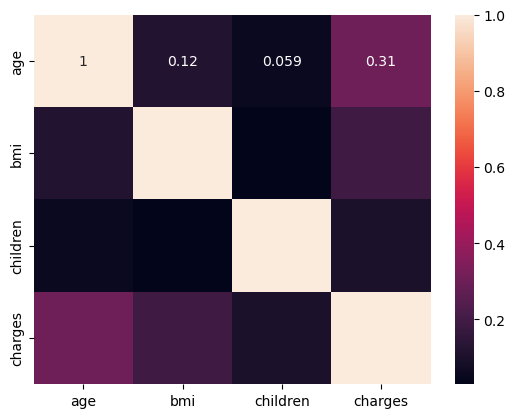

In [50]:
import seaborn as sns
print('Pearson correlation')
sns.heatmap(df.corr(numeric_only=True, method = 'pearson'),annot=True)
plt.show()

Spearman correlation


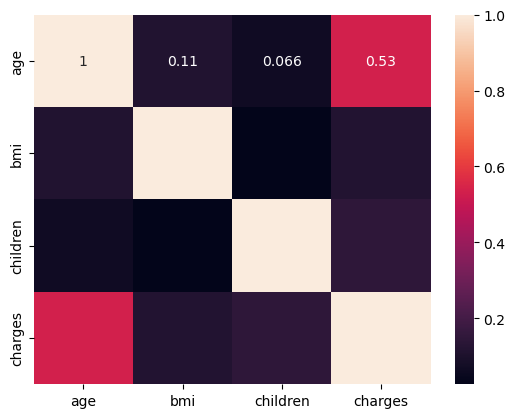

In [51]:
print('Spearman correlation')
sns.heatmap(df.corr(numeric_only=True, method = 'spearman'),annot=True)
plt.show()

In [ ]:
14) Apply Principal Component Analysis (PCA) for matrix factorization 

In [52]:
pca_x = x[numeric_cols]
print(pca_x.shape)
scaler = StandardScaler()
pca_x[:] = scaler.fit_transform(pca_x)

(1309, 4)


C:\Users\mehra\AppData\Local\Temp\ipykernel_5676\1913622300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_x[:] = scaler.fit_transform(pca_x)


In [53]:
s = pca_x.cov()
s

,age,bmi,children,charges
age,1.000765,0.118268,0.059145,0.305496
bmi,0.118268,1.000765,0.029939,0.191599
children,0.059145,0.029939,1.000765,0.100515
charges,0.305496,0.191599,0.100515,1.000765


In [54]:
from scipy import linalg
eg_val, eg_vect = linalg.eig(s)
eg_vect = pd.DataFrame(eg_vect, columns = s.columns).set_index(s.index)
eg_vect['EigenValue'] = eg_val
eg_vect.head()

,age,bmi,children,charges,EigenValue
age,0.581195,0.619362,0.518312,-0.099778,1.450803+0.000000j
bmi,0.440671,0.210507,-0.808767,-0.327706,0.680929+0.000000j
children,0.248093,0.101318,-0.218638,0.938287,0.892412+0.000000j
charges,0.637551,-0.749542,0.171597,-0.047653,0.978914+0.000000j


In [55]:
top_n = 3
top_vectors = eg_vect.sort_values(by = 'EigenValue', ascending = False).head(top_n)
top_vectors

,age,bmi,children,charges,EigenValue
age,0.581195,0.619362,0.518312,-0.099778,1.450803+0.000000j
charges,0.637551,-0.749542,0.171597,-0.047653,0.978914+0.000000j
children,0.248093,0.101318,-0.218638,0.938287,0.892412+0.000000j


In [56]:
print('Top', top_n, 'features are:')
print(top_vectors.index)

Top 3 features are:
Index(['age', 'charges', 'children'], dtype='object')


In [ ]:
15)Apply Linear Discriminant Analysis (LDA) to perform feature extraction

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [57]:
def extract_num(s):
    return int(s.strip('abcdefghijklmnopqrstuvwxyz'))
selector = LinearDiscriminantAnalysis()
selector.fit(x[numeric_cols], y)
col_inds = map(extract_num, selector.get_feature_names_out(numeric_cols))
print('Selected columns are:', [numeric_cols[i] for i in col_inds])

Selected columns are: ['age']


In [ ]:
RESULT
     Feature extraction and Feature selection is done successfully using python program and output is verified.